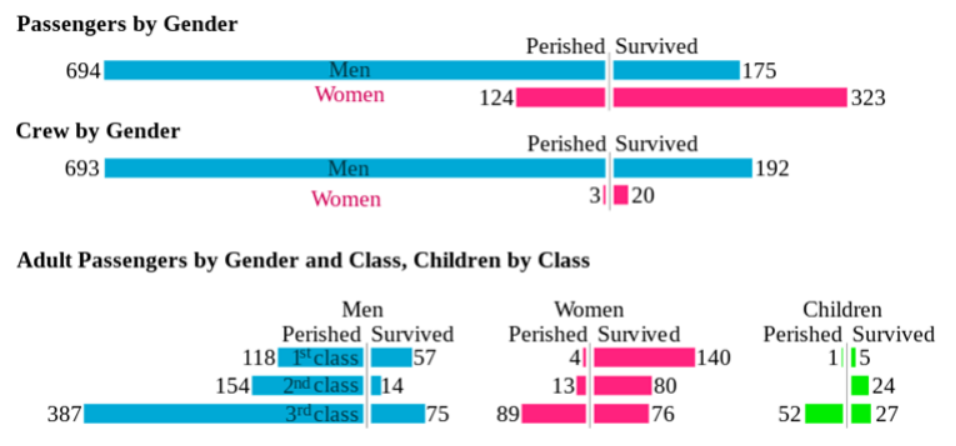
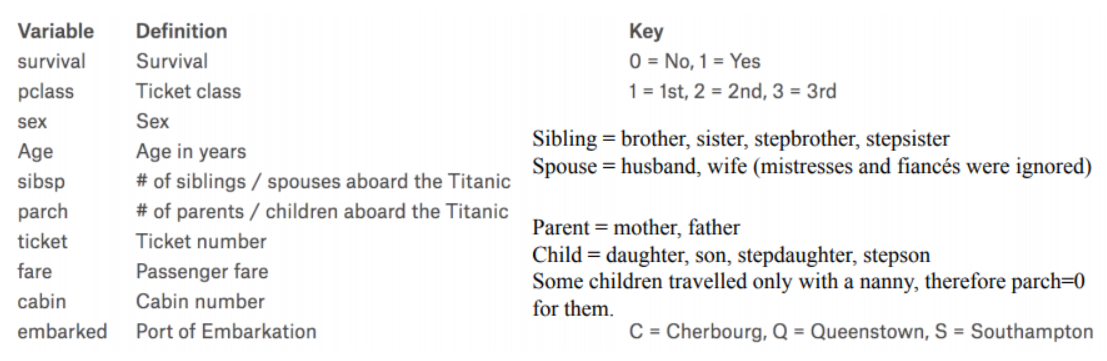
- 결과 제출은 (ID, 생존예측) 형태로 제출
- 제출된 결과를 바탕으로 accuracy 점수로 등수 산정

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Load dataset

- index는 PassengerId로 설정
- y_train은 'Survived' 여부로 지정

In [2]:
train_df = pd.read_csv('titanic/train.csv').set_index('PassengerId')
test_df = pd.read_csv('titanic/test.csv').set_index('PassengerId')

In [3]:
train_df.head(1)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


In [4]:
test_df.head(1)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q


In [6]:
train_index = train_df.index
test_index = test_df.index

In [7]:
y_train_df = train_df.pop("Survived")
y_train_df.head(3)

PassengerId
1    0
2    1
3    1
Name: Survived, dtype: int64

### Data preproecessing

In [8]:
# 실수 소수점 2자리까지만 나타나도록 pandas 설정
pd.set_option('display.float_format', lambda x: '%.2f' % x)

#### 결측치 확인

In [9]:
test_df.isnull().sum() / len(test_df)

Pclass     0.00
Name       0.00
Sex        0.00
Age        0.21
SibSp      0.00
Parch      0.00
Ticket     0.00
Fare       0.00
Cabin      0.78
Embarked   0.00
dtype: float64

In [10]:
train_df.isnull().sum() / len(train_df) * 100

Pclass      0.00
Name        0.00
Sex         0.00
Age        19.87
SibSp       0.00
Parch       0.00
Ticket      0.00
Fare        0.00
Cabin      77.10
Embarked    0.22
dtype: float64

#### Decision 1 - Drop cabin
- 결측치가 80% 가까이 되므로

In [11]:
del test_df['Cabin']
del train_df['Cabin']

In [12]:
all_df = train_df.append(test_df)
all_df

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,S
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C
3,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,S
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,S
5,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,S
...,...,...,...,...,...,...,...,...,...
1305,3,"Spector, Mr. Woolf",male,nan,0,0,A.5. 3236,8.05,S
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.00,0,0,PC 17758,108.90,C
1307,3,"Saether, Mr. Simon Sivertsen",male,38.50,0,0,SOTON/O.Q. 3101262,7.25,S


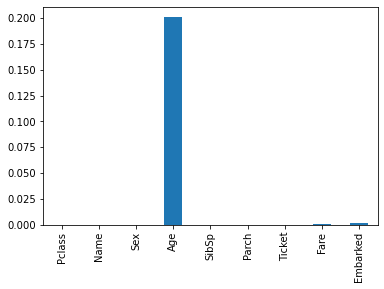

In [13]:
(all_df.isnull().sum() / len(all_df)).plot(kind = 'bar')
plt.show()

#### Decision 2 - Drop Name, Ticket
- 큰 의미가 없으므로

In [14]:
del all_df['Name']
del all_df['Ticket']

In [15]:
all_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
1,3,male,22.00,1,0,7.25,S
2,1,female,38.00,1,0,71.28,C
3,3,female,26.00,0,0,7.92,S
4,1,female,35.00,1,0,53.10,S
5,3,male,35.00,0,0,8.05,S


#### Decision 3 - Categorical Data 변경
- 'Sex'는 0과 1로만 변경하면 완료
- 'Embarked'는 0, 1, 2, 99로 변경 후 다시 One-Hot Encoding하면 완료

In [16]:
all_df['Sex'] = all_df['Sex'].replace({'male' : 0, 'female' : 1})
all_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
1,3,0,22.00,1,0,7.25,S
2,1,1,38.00,1,0,71.28,C
3,3,1,26.00,0,0,7.92,S
4,1,1,35.00,1,0,53.10,S
5,3,0,35.00,0,0,8.05,S


In [17]:
all_df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [18]:
all_df['Embarked'] = all_df['Embarked'].replace({'S' : 0, 'C' : 1, 'Q' : 2, np.nan : 99})
all_df['Embarked'].unique()

array([ 0,  1,  2, 99], dtype=int64)

In [19]:
all_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
1,3,0,22.00,1,0,7.25,0
2,1,1,38.00,1,0,71.28,1
3,3,1,26.00,0,0,7.92,0
4,1,1,35.00,1,0,53.10,0
5,3,0,35.00,0,0,8.05,0


In [20]:
pd.get_dummies(all_df['Embarked'], prefix = 'embarked')

,embarked_0,embarked_1,embarked_2,embarked_99
PassengerId,,,,
1,1,0,0,0
2,0,1,0,0
3,1,0,0,0
4,1,0,0,0
5,1,0,0,0
...,...,...,...,...
1305,1,0,0,0
1306,0,1,0,0
1307,1,0,0,0


In [21]:
matrix_df = pd.merge(all_df, 
                     pd.get_dummies(all_df['Embarked'], prefix = 'embarked'),
                     left_index = True,
                     right_index = True)
matrix_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,embarked_0,embarked_1,embarked_2,embarked_99
PassengerId,,,,,,,,,,,
1,3,0,22.00,1,0,7.25,0,1,0,0,0
2,1,1,38.00,1,0,71.28,1,0,1,0,0
3,3,1,26.00,0,0,7.92,0,1,0,0,0
4,1,1,35.00,1,0,53.10,0,1,0,0,0
5,3,0,35.00,0,0,8.05,0,1,0,0,0


In [23]:
matrix_df.corr()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,embarked_0,embarked_1,embarked_2,embarked_99
Pclass,1.00,-0.12,-0.41,0.06,0.02,-0.56,-0.05,0.10,-0.27,0.23,-0.06
Sex,-0.12,1.00,-0.06,0.11,0.21,0.19,0.07,-0.12,0.07,0.09,0.05
Age,-0.41,-0.06,1.00,-0.24,-0.15,0.18,0.07,-0.08,0.09,-0.02,0.06
SibSp,0.06,0.11,-0.24,1.00,0.37,0.16,-0.03,0.08,-0.05,-0.05,-0.02
Parch,0.02,0.21,-0.15,0.37,1.00,0.22,-0.03,0.07,-0.01,-0.10,-0.02
Fare,-0.56,0.19,0.18,0.16,0.22,1.00,0.05,-0.17,0.29,-0.13,0.04
Embarked,-0.05,0.07,0.07,-0.03,-0.03,0.05,1.00,-0.21,0.06,0.12,0.99
embarked_0,0.10,-0.12,-0.08,0.08,0.07,-0.17,-0.21,1.00,-0.78,-0.49,-0.06
embarked_1,-0.27,0.07,0.09,-0.05,-0.01,0.29,0.06,-0.78,1.00,-0.16,-0.02
embarked_2,0.23,0.09,-0.02,-0.05,-0.10,-0.13,0.12,-0.49,-0.16,1.00,-0.01


#### Decision 4 - Age 결측치 처리
- 'Age'에 20% 정도의 결측치가 있었음
- Pclass로 groupby하여 각 Pclass별 Age의 평균값으로 결측치 처리를 할 것

In [24]:
all_df.groupby('Pclass')['Age'].mean()

Pclass
1   39.16
2   29.51
3   24.82
Name: Age, dtype: float64

In [25]:
# 밑의 loc으로 하는 과정은 사실상 이 한 줄로 웬만큼 처리 가능
all_df['Age'].fillna(all_df.groupby('Pclass')['Age'].transform('mean'))

PassengerId
1      22.00
2      38.00
3      26.00
4      35.00
5      35.00
        ... 
1305   24.82
1306   39.00
1307   38.50
1308   24.82
1309   24.82
Name: Age, Length: 1309, dtype: float64

In [26]:
all_df.loc[(all_df['Pclass'] == 1) & (all_df['Age'].isnull()), 'Age']

PassengerId
32     nan
56     nan
65     nan
167    nan
169    nan
186    nan
257    nan
271    nan
285    nan
296    nan
299    nan
307    nan
335    nan
352    nan
376    nan
458    nan
476    nan
508    nan
528    nan
558    nan
603    nan
634    nan
670    nan
712    nan
741    nan
767    nan
794    nan
816    nan
840    nan
850    nan
914    nan
933    nan
1038   nan
1040   nan
1060   nan
1083   nan
1097   nan
1158   nan
1182   nan
Name: Age, dtype: float64

In [27]:
all_df.loc[(all_df['Pclass'] == 1) & (all_df['Age'].isnull()), 'Age'] = 39.16
all_df.loc[(all_df['Pclass'] == 2) & (all_df['Age'].isnull()), 'Age'] = 29.51
all_df.loc[(all_df['Pclass'] == 3) & (all_df['Age'].isnull()), 'Age'] = 24.82

#### 중간 데이터 확인

In [28]:
all_df.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        1
Embarked    0
dtype: int64

#### Decision 5 - Fare 결측치 처리
- 'Fare'에 1개 결측치가 있음
- Pclass로 groupby하여 Pclass별 Fare의 평균값으로 결측치 처리

In [29]:
all_df.groupby('Pclass')['Fare'].mean()

Pclass
1   87.51
2   21.18
3   13.30
Name: Fare, dtype: float64

In [30]:
all_df[all_df['Fare'].isnull()]

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
1044,3,0,60.50,0,0,nan,0


In [31]:
all_df.loc[all_df['Fare'].isnull(), 'Fare'] = 13.30

embarked_0 ~ embarked_99로 변환한 column들이 있으므로 기존 'Embarked' column 삭제

In [32]:
del all_df['Embarked']

#### Decision 6 - 'Pclass' Categorical Data 변경
- 'Pclass'는 A, B, C로 변경 후 다시 One-Hot Encoding

In [33]:
all_df['Pclass'] = all_df['Pclass'].replace({1 : 'A', 2 : 'B', 3 : 'C'})
all_df = pd.get_dummies(all_df)
all_df.head()

,Sex,Age,SibSp,Parch,Fare,Pclass_A,Pclass_B,Pclass_C
PassengerId,,,,,,,,
1,0,22.00,1,0,7.25,0,0,1
2,1,38.00,1,0,71.28,1,0,0
3,1,26.00,0,0,7.92,0,0,1
4,1,35.00,1,0,53.10,1,0,0
5,0,35.00,0,0,8.05,0,0,1


In [34]:
all_df = pd.merge(all_df, 
                  matrix_df[['embarked_0', 'embarked_1', 'embarked_2', 'embarked_99']],
                  left_index = True,
                  right_index = True)

In [36]:
all_df.head()

,Sex,Age,SibSp,Parch,Fare,Pclass_A,Pclass_B,Pclass_C,embarked_0,embarked_1,embarked_2,embarked_99
PassengerId,,,,,,,,,,,,
1,0,22.00,1,0,7.25,0,0,1,1,0,0,0
2,1,38.00,1,0,71.28,1,0,0,0,1,0,0
3,1,26.00,0,0,7.92,0,0,1,1,0,0,0
4,1,35.00,1,0,53.10,1,0,0,1,0,0,0
5,0,35.00,0,0,8.05,0,0,1,1,0,0,0


In [38]:
# isin(condition) : condition에 해당하는 값이 들어있는 행 indexing하여 boolean값으로 return
# all_df는 train과 test를 합쳐놓은 데이터이므로 필요한 과정

train_df = all_df[all_df.index.isin(train_index)]
test_df = all_df[all_df.index.isin(test_index)]

In [39]:
train_df.head(3)

,Sex,Age,SibSp,Parch,Fare,Pclass_A,Pclass_B,Pclass_C,embarked_0,embarked_1,embarked_2,embarked_99
PassengerId,,,,,,,,,,,,
1,0,22.00,1,0,7.25,0,0,1,1,0,0,0
2,1,38.00,1,0,71.28,1,0,0,0,1,0,0
3,1,26.00,0,0,7.92,0,0,1,1,0,0,0


In [40]:
test_df.head(3)

,Sex,Age,SibSp,Parch,Fare,Pclass_A,Pclass_B,Pclass_C,embarked_0,embarked_1,embarked_2,embarked_99
PassengerId,,,,,,,,,,,,
892,0,34.50,0,0,7.83,0,0,1,0,0,1,0
893,1,47.00,1,0,7.00,0,0,1,1,0,0,0
894,0,62.00,0,0,9.69,0,1,0,0,0,1,0


### Build Model
- 원래라면 feature scaling도 필요함

In [45]:
x_data = train_df.values
y_data = y_train_df.values

In [46]:
x_data.shape, y_data.shape

((891, 12), (891,))

In [47]:
from sklearn.linear_model import LogisticRegression
cls = LogisticRegression()
cls.fit(x_data, y_data)

C:\Users\PC\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [48]:
cls.intercept_

array([0.18050846])

In [49]:
cls.coef_

array([[ 2.60571381e+00, -4.12469079e-02, -3.26507764e-01,
        -8.31799689e-02,  2.38708163e-03,  1.11434519e+00,
         1.45268940e-01, -1.09245485e+00, -2.11358968e-01,
         2.12943621e-01,  9.92113853e-02,  6.63632380e-02]])

### Prediction

In [50]:
x_test = test_df.values
y_test = cls.predict(x_test)
y_test

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [51]:
result = np.concatenate((test_index.values.reshape(-1, 1),
                         y_test.reshape(-1, 1)), 
                         axis = 1)
result[:5]

array([[892,   0],
       [893,   0],
       [894,   0],
       [895,   0],
       [896,   1]], dtype=int64)

In [52]:
df_submission = pd.DataFrame(result, columns = ['PassengerId', 'Survived'])
df_submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [53]:
df_submission.to_csv('submission_result.csv', index = False)